In [ ]:
from google.colab import files

# Upload your CSV file
uploaded = files.upload()

Saving oversampled_dataset (2).csv to oversampled_dataset (2) (1).csv


# Step 1: Importing Libraries

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# Step 2: Loading Data




In [ ]:
data = pd.read_csv("oversampled_dataset (2).csv")


# Step 3: Splitting Data

In [ ]:
X = data[['magnitude', 'depth', 'latitude', 'longitude']]
y = data['alert']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 4: Model Training and Evaluation


**XGBoost**

In [ ]:
xgb_params = {'objective': 'multi:softmax', 'num_class': len(y.unique())}
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_rounds = 200
xgb_model = xgb.train(xgb_params, dtrain, num_rounds)


**Random Forest Bagging**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**AdaBoost**

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

**Gradient Boosting**

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

**Stacking**

In [ ]:
stacking_train_pred = []
stacking_test_pred = []

stacking_train_pred.append(xgb_model.predict(dtrain))
stacking_test_pred.append(y_pred_xgb)

stacking_train_pred.append(rf_model.predict(X_train))
stacking_test_pred.append(y_pred_rf)





**Training Logistic Regression on Stacking Predictions**

In [ ]:
stacking_train_pred = pd.DataFrame(stacking_train_pred).T
stacking_test_pred = pd.DataFrame(stacking_test_pred).T

lr_stacking = LogisticRegression()
lr_stacking.fit(stacking_train_pred, y_train)


LogisticRegression()

# Step 7: Visualizing Results

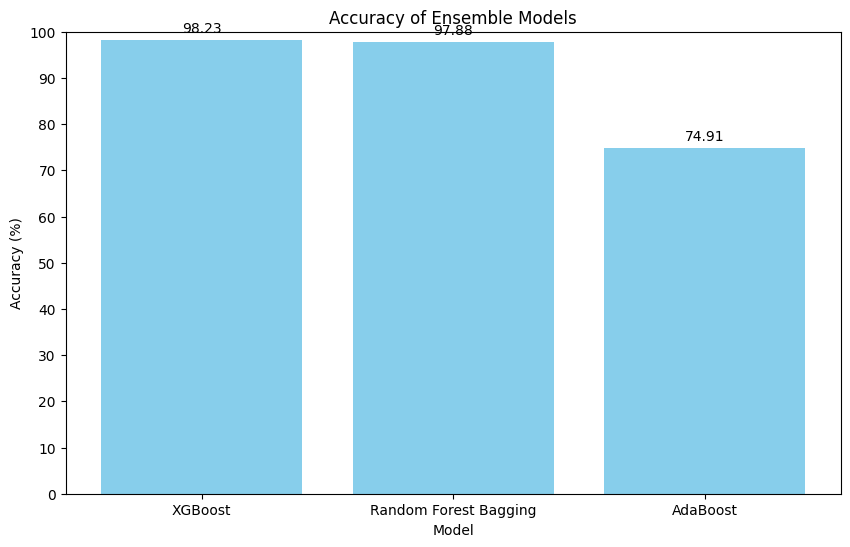

In [ ]:
plt.figure(figsize=(10, 6))
models, accuracy_values = zip(*accuracies)
plt.bar(models, accuracy_values, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Ensemble Models')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 1, str(round(v, 2)), ha='center', va='bottom')
plt.show()
